In [2]:
import pandas as pd

file_path = '경희대 ndvi.csv'

data = pd.read_csv(file_path)

data.head()

,zone,m²,sum,count,min,max,mean
0,0.636889,900.0,0.636889,1,0.636889,0.636889,0.636889
1,0.150118,900.0,0.150118,1,0.150118,0.150118,0.150118
2,0.748323,900.0,0.748323,1,0.748323,0.748323,0.748323
3,0.705957,900.0,0.705957,1,0.705957,0.705957,0.705957
4,0.529419,900.0,0.529419,1,0.529419,0.529419,0.529419


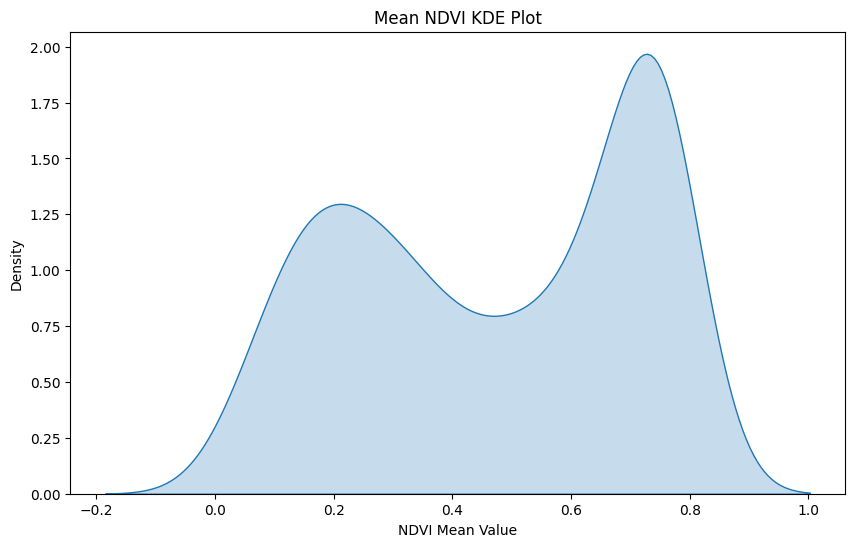

(None,
 count    481.000000
 mean       0.474129
 std        0.244450
 min        0.028539
 25%        0.240532
 50%        0.509633
 75%        0.718381
 max        0.789220
 Name: mean, dtype: float64)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


# KDE 그래프 그리기
plt.figure(figsize=(10, 6))
sns.kdeplot(data['mean'], fill=True)
plt.title('Mean NDVI KDE Plot')
plt.xlabel('NDVI Mean Value')
plt.ylabel('Density')

# 기술적 통계 계산
descriptive_stats = data['mean'].describe()

plt.show(), descriptive_stats

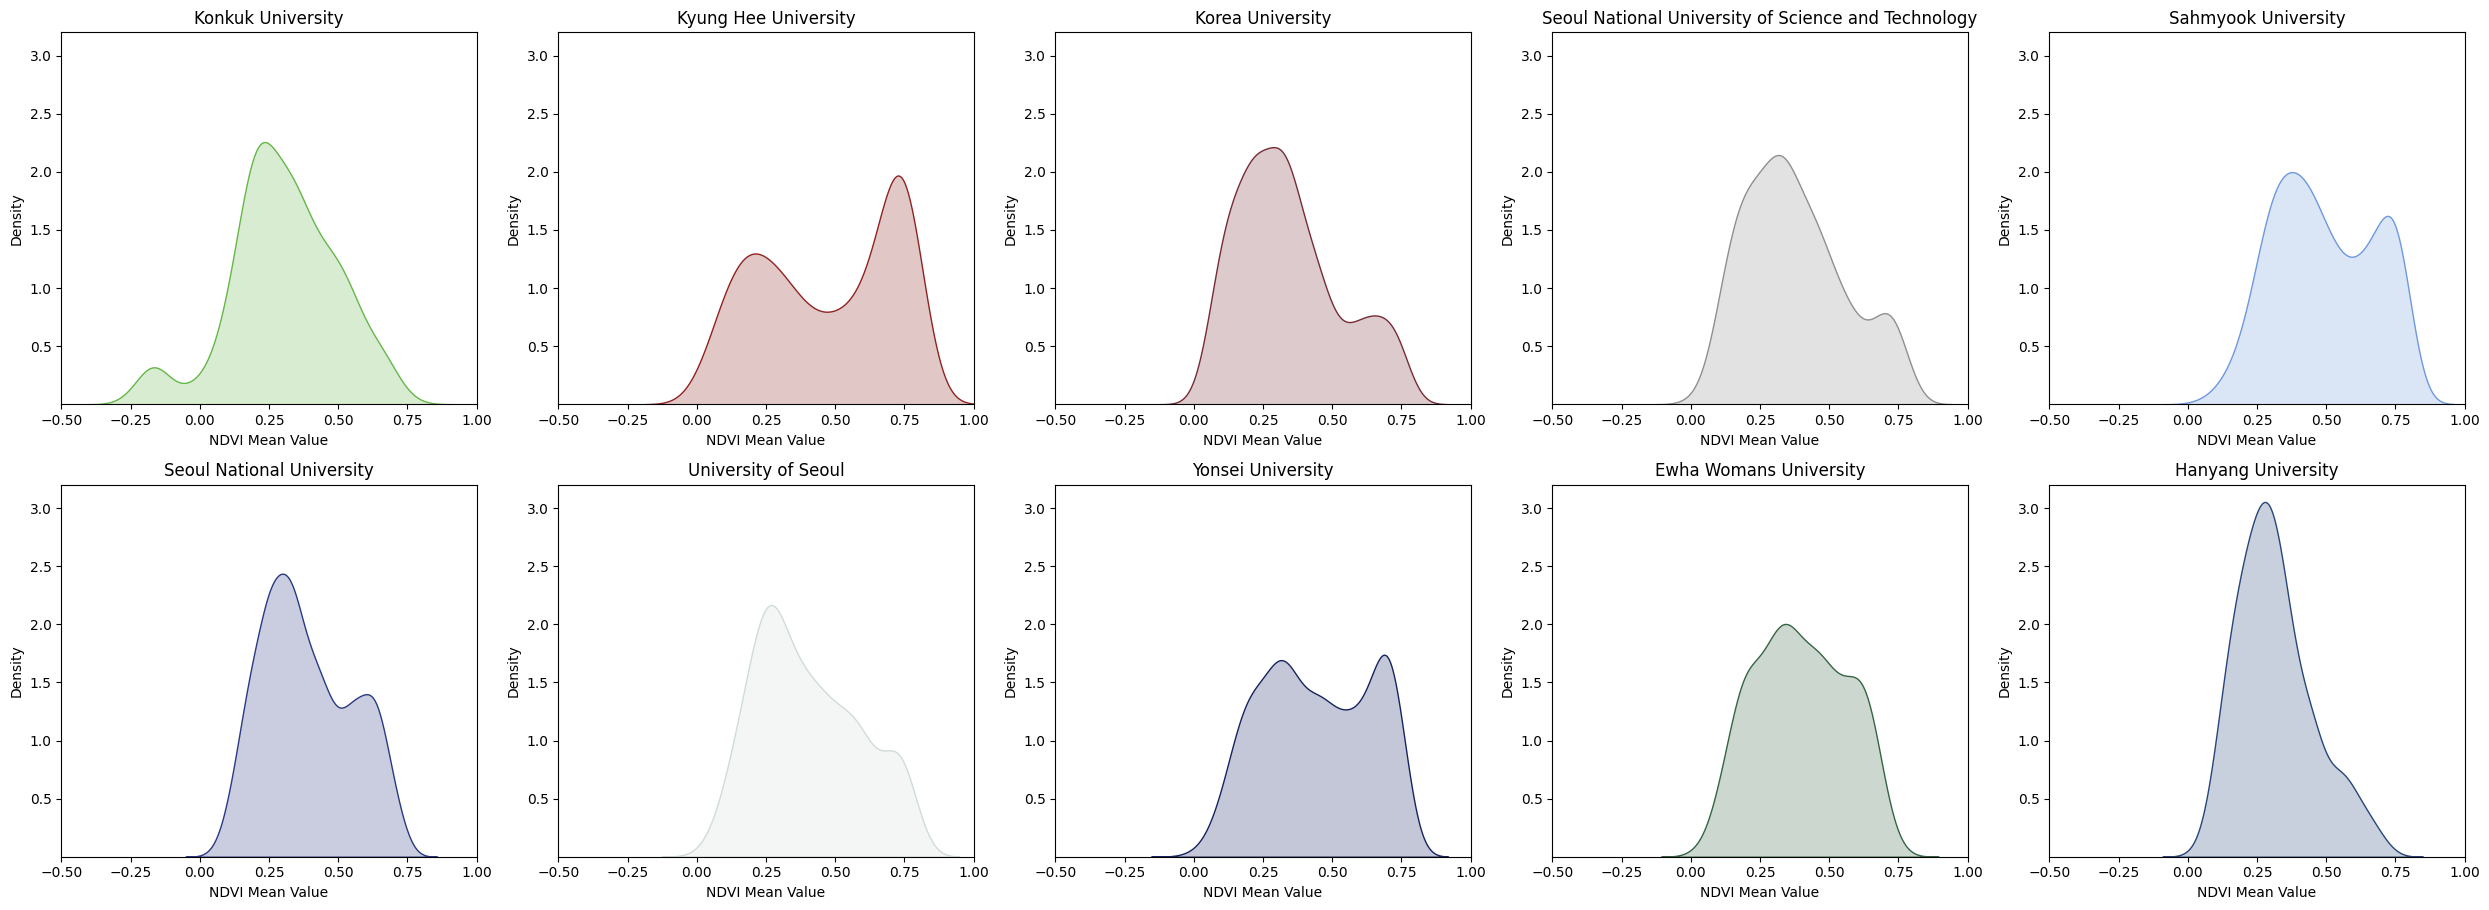

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

universities_info = [
    ('건국대', 'Konkuk University', (101, 183, 73)),
    ('경희대', 'Kyung Hee University', (142, 35, 32)),
    ('고려대', 'Korea University', (118, 44, 53)),
    ('과기대', 'Seoul National University of Science and Technology', (143, 143, 143)),
    ('삼육대', 'Sahmyook University', (110, 152, 223)),
    ('서울대', 'Seoul National University', (42, 57, 131)),
    ('시립대', 'University of Seoul', (208, 220, 218)),
    ('연세대', 'Yonsei University', (22, 35, 97)),
    ('이화여대', 'Ewha Womans University', (52, 101, 66)),
    ('한양대', 'Hanyang University', (40, 69, 121))
]


# 그래프 생성 설정
fig, axes = plt.subplots(2, 5, figsize=(25, 10))  # 5x2 플롯 생성

for i, (uni, eng_name, color) in enumerate(universities_info):
    # 파일 경로 설정
    file_path = f'{uni} ndvi.csv'

    # 데이터 로드
    data = pd.read_csv(file_path)

    # 행과 열의 위치 계산
    row = i // 5
    col = i % 5

    # RGB 색상을 0에서 1 사이의 값으로 변환
    color_normalized = tuple([x/255 for x in color])

    # KDE 그래프 생성, 지정된 RGB 색상 적용
    sns.kdeplot(data['mean'], fill=True, ax=axes[row, col], color=color_normalized)
    axes[row, col].set_title(f'{eng_name}')
    axes[row, col].set_xlabel('NDVI Mean Value')
    axes[row, col].set_ylabel('Density')

    # x축과 y축의 범위 및 간격 설정
    axes[row, col].set_xticks([-0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
    axes[row, col].set_yticks([0.5, 1, 1.5, 2, 2.5, 3])
    axes[row, col].set_xlim(-0.5, 1)
    axes[row, col].set_ylim(0, 3.2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # 전체 그래프 레이아웃 조정
plt.show()

